In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv('insurance.csv')

In [150]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [151]:
df.shape

(1338, 7)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [153]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [154]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

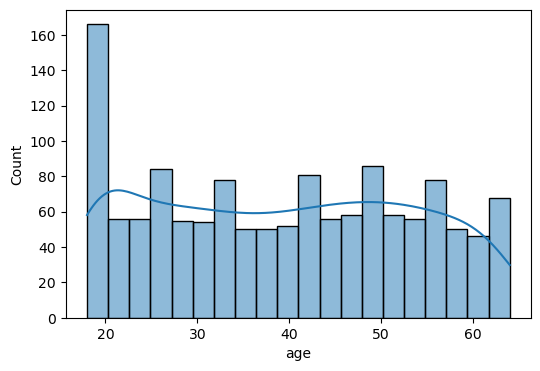

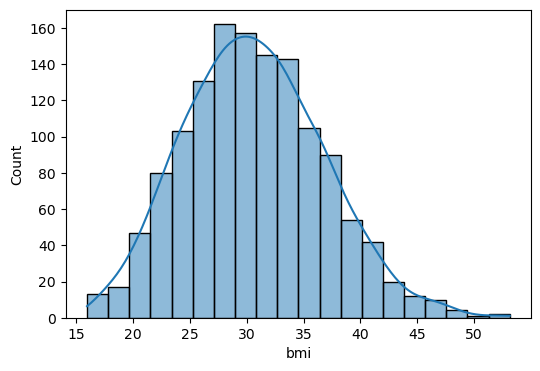

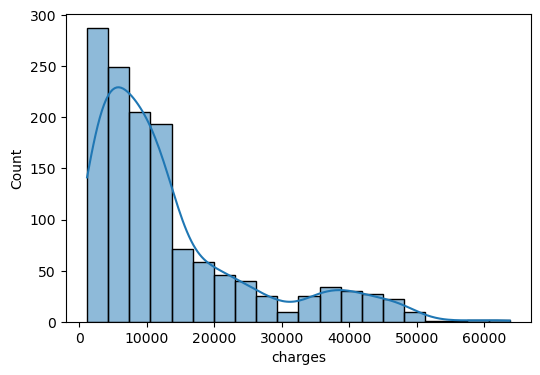

In [155]:
numericCol = ['age', 'bmi', 'charges']

for i in numericCol:
    plt.figure(figsize = (6,4))
    sns.histplot(df[i], kde = True, bins = 20)

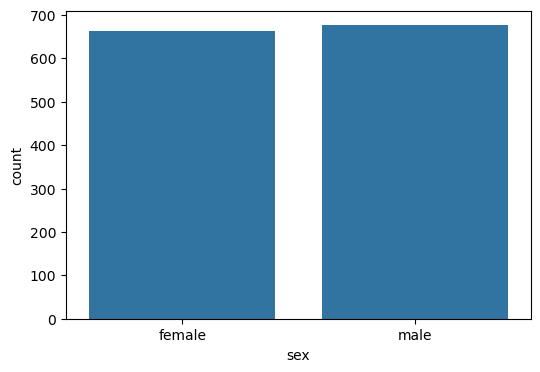

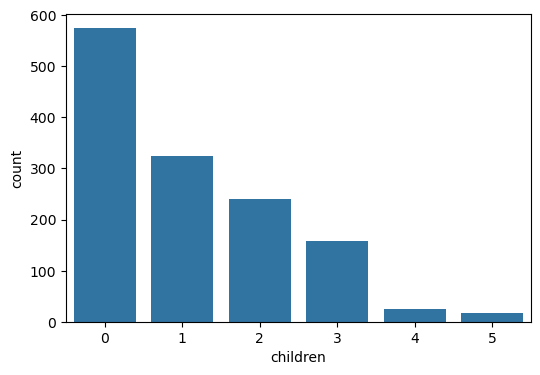

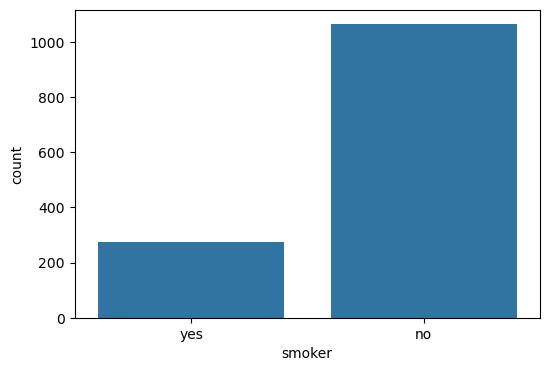

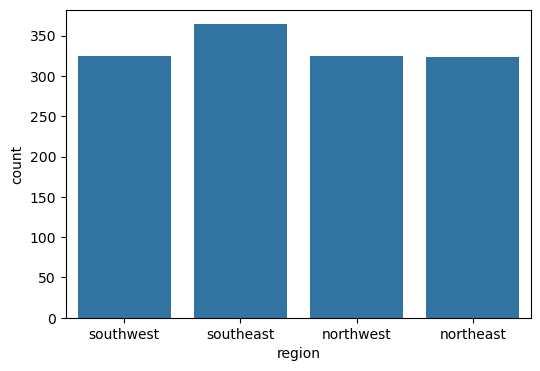

In [156]:
categoricalCol = ['sex', 'children', 'smoker', 'region',]

for i in categoricalCol:
    plt.figure(figsize = (6,4))
    sns.countplot(x = df[i])
    plt.show()

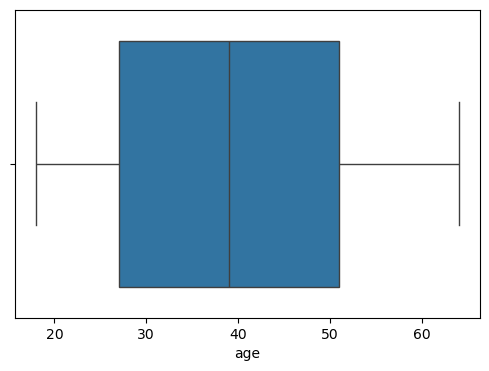

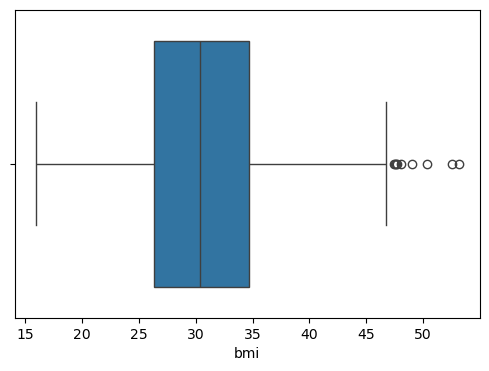

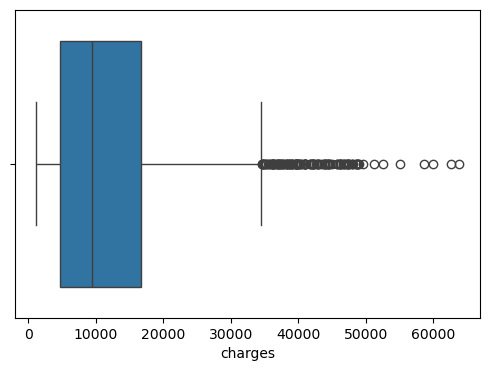

In [157]:
for i in numericCol:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[i])

<Axes: >

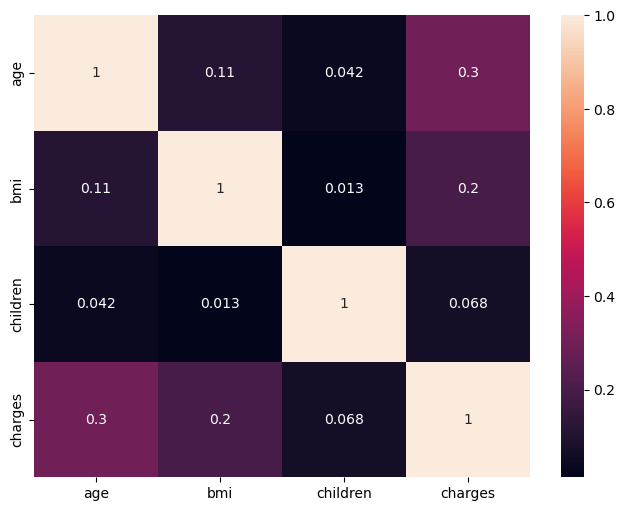

In [158]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning & Processing

## Data Cleaning

In [159]:
dfCleaned = df.copy()
dfCleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [160]:
dfCleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [161]:
dfCleaned.shape

(1338, 7)

In [162]:
dfCleaned.drop_duplicates(inplace = True)

In [163]:
dfCleaned.shape

(1337, 7)

## Data Processing

In [164]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Lable Encoding

In [165]:
dfCleaned['sex'].unique()

array(['female', 'male'], dtype=object)

In [166]:
# Converting sex value into 0 and 1

dfCleaned['sex'] = dfCleaned['sex'].map({
    'male' : 0,
    'female' : 1
})

In [167]:
dfCleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [168]:
dfCleaned['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [169]:
# Converting smoker value into 0 and 1

dfCleaned['smoker'] = dfCleaned['smoker'].map({
    'no' : 0,
    'yes' : 1,
})

In [170]:
dfCleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [171]:
dfCleaned.rename(columns = {
    'sex' : 'is_female',
    'smoker' : 'is_smoker'
}, inplace = True)

In [172]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


One Hot Encoding

In [173]:
dfCleaned['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [174]:
dfCleaned = pd.get_dummies(data = dfCleaned, columns = ['region'], drop_first = True)

In [175]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [176]:
dfCleaned = dfCleaned.astype('int')

In [177]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

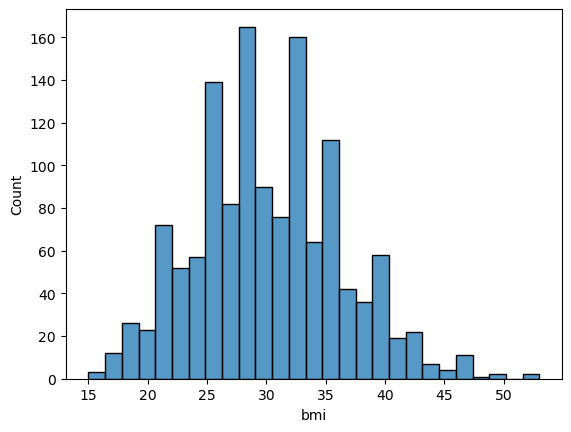

In [178]:
sns.histplot(dfCleaned['bmi'])

In [179]:
# For BMI

dfCleaned['bmiCategory'] = pd.cut(
    dfCleaned['bmi'],
    bins = [0, 18.5, 24.9, 29.9, float('inf')],
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [180]:
dfCleaned['bmiCategory'].unique()

['Overweight', 'Obese', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [181]:
# Convert bmiCategory into 0 & 1 using one hot eUnicodeWarning

dfCleaned = pd.get_dummies(data = dfCleaned, columns = ['bmiCategory'], drop_first = True)

In [182]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmiCategory_Normal,bmiCategory_Overweight,bmiCategory_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [183]:
# For Age

dfCleaned['ageGroup'] = pd.cut(
    dfCleaned['age'],
    bins = [0, 25, 40, 60, 100],
    labels = ['Young', 'Adult', 'Middle Age', 'Old']
)

In [184]:
# Convert ageGroup into 0 & 1 using one hot eUnicodeWarning

dfCleaned = pd.get_dummies(data = dfCleaned, columns = ['ageGroup'], drop_first = True)

In [185]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmiCategory_Normal,bmiCategory_Overweight,bmiCategory_Obese,ageGroup_Adult,ageGroup_Middle Age,ageGroup_Old
0,19,1,27,0,1,16884,0,0,1,False,True,False,False,False,False
1,18,0,33,1,0,1725,0,1,0,False,False,True,False,False,False
2,28,0,33,3,0,4449,0,1,0,False,False,True,True,False,False
3,33,0,22,0,0,21984,1,0,0,True,False,False,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False,True,False,False


In [186]:
# now convert all dfCleaned values into interger

dfCleaned= dfCleaned.astype(int)

In [187]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmiCategory_Normal,bmiCategory_Overweight,bmiCategory_Obese,ageGroup_Adult,ageGroup_Middle Age,ageGroup_Old
0,19,1,27,0,1,16884,0,0,1,0,1,0,0,0,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,0,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,1,0,0


# Feature Scaling

In [188]:
dfCleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCategory_Normal', 'bmiCategory_Overweight', 'bmiCategory_Obese',
       'ageGroup_Adult', 'ageGroup_Middle Age', 'ageGroup_Old'],
      dtype='object')

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col = ['age', 'bmi', 'children']

dfCleaned[col] = scaler.fit_transform(dfCleaned[col])

In [190]:
dfCleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmiCategory_Normal,bmiCategory_Overweight,bmiCategory_Obese,ageGroup_Adult,ageGroup_Middle Age,ageGroup_Old
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,1,0,0


# Feature Extraction or Selection

In [191]:
dfCleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCategory_Normal', 'bmiCategory_Overweight', 'bmiCategory_Obese',
       'ageGroup_Adult', 'ageGroup_Middle Age', 'ageGroup_Old'],
      dtype='object')

In [192]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
       'age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCategory_Normal', 'bmiCategory_Overweight', 'bmiCategory_Obese',
       'ageGroup_Adult', 'ageGroup_Middle Age', 'ageGroup_Old'
]

correlations = {
    feature: pearsonr(dfCleaned[feature], dfCleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmiCategory_Obese,0.200348
2,bmi,0.196236
12,ageGroup_Middle Age,0.179099
13,ageGroup_Old,0.173769
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637


In [193]:
dfCleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCategory_Normal', 'bmiCategory_Overweight', 'bmiCategory_Obese',
       'ageGroup_Adult', 'ageGroup_Middle Age', 'ageGroup_Old'],
      dtype='object')

In [194]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmiCategory_Normal', 'bmiCategory_Overweight', 'bmiCategory_Obese'
]

In [195]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

dfCleaned['charges_bin'] = pd.qcut(dfCleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(dfCleaned[col], dfCleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmiCategory_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmiCategory_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmiCategory_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [200]:
finalDF = dfCleaned[['age', 'is_smoker', 'region_southeast', 'is_female', 'bmiCategory_Obese', 'bmi', 'ageGroup_Middle Age', 'ageGroup_Old', 'children', 'charges']]

In [201]:
finalDF

,age,is_smoker,region_southeast,is_female,bmiCategory_Obese,bmi,ageGroup_Middle Age,ageGroup_Old,children,charges
0,-1.440418,1,0,1,0,-0.517949,0,0,-0.909234,16884
1,-1.511647,0,1,0,1,0.462463,0,0,-0.079442,1725
2,-0.799350,0,1,0,1,0.462463,0,0,1.580143,4449
3,-0.443201,0,0,0,0,-1.334960,0,0,-0.909234,21984
4,-0.514431,0,0,0,0,-0.354547,0,0,-0.909234,3866
...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,0,0,1,-0.027743,1,0,1.580143,10600
1334,-1.511647,0,0,1,1,0.135659,0,0,-0.909234,2205
1335,-1.511647,0,1,1,1,0.952670,0,0,-0.909234,1629
1336,-1.297958,0,0,1,0,-0.844753,0,0,-0.909234,2007


OK, Now this 'finalDF' is ready for feeding to machine learning model

Thank You 🥰
Take Care ♥